Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


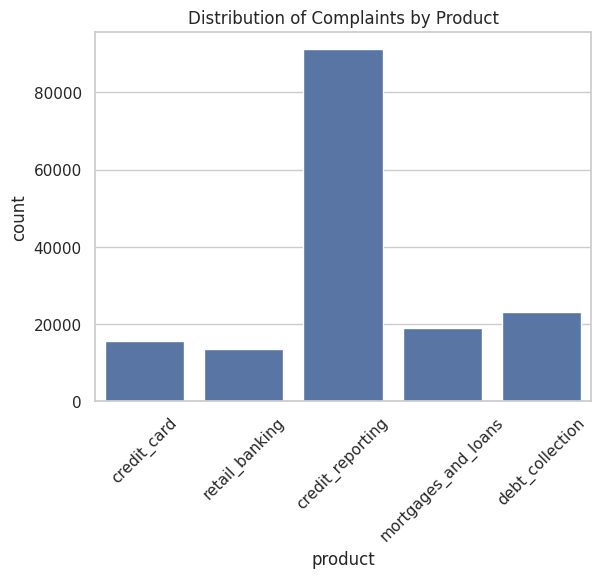

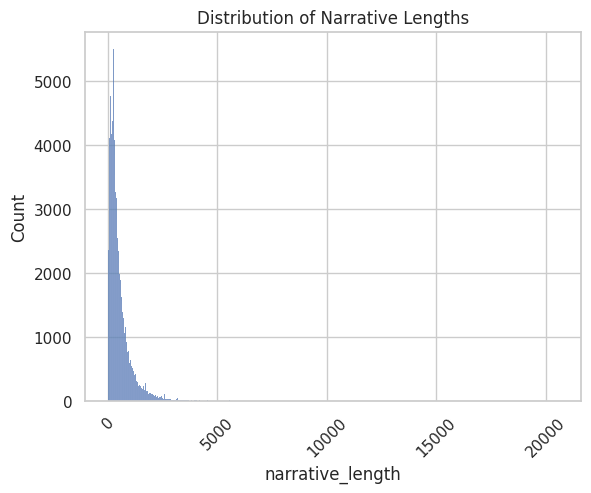

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Complaint_No         162421 non-null  int64 
 1   narrative            162411 non-null  object
 2   narrative_length     162421 non-null  int64 
 3   credit_card          162421 non-null  uint8 
 4   credit_reporting     162421 non-null  uint8 
 5   debt_collection      162421 non-null  uint8 
 6   mortgages_and_loans  162421 non-null  uint8 
 7   retail_banking       162421 non-null  uint8 
dtypes: int64(2), object(1), uint8(5)
memory usage: 4.5+ MB


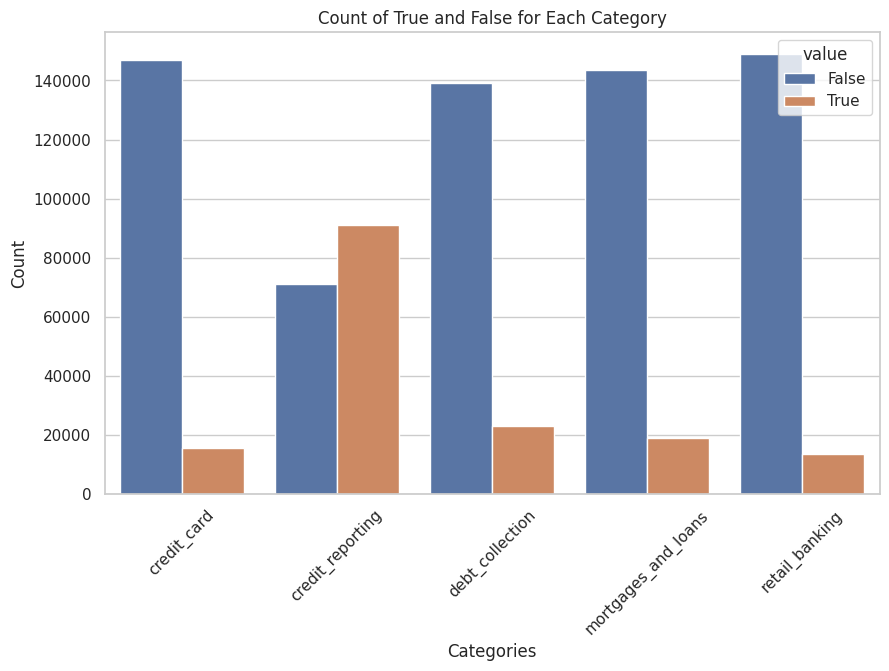

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/MyDrive/CSV/complaints.csv")
df.head()


df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)
df.head()

unique=df["product"].unique()
unique

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='product', data=df)
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

#----------
#----------

df['narrative_length'] = df['narrative'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
sns.histplot(df['narrative_length'])
plt.title('Distribution of Narrative Lengths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


df_encoded = pd.get_dummies(df['product'])
df = pd.concat([df, df_encoded], axis=1)
df.head()
df = df.drop('product', axis=1)
df.head()
df.info()
df.isnull().sum()

df=df.dropna()
df.isnull().sum()
df.duplicated().sum()

import seaborn as sns
import matplotlib.pyplot as plt

df_melted = pd.melt(df, value_vars=["credit_card", "credit_reporting", "debt_collection", "mortgages_and_loans", "retail_banking"])

df_melted["value"] = df_melted["value"].astype(bool)

#-------
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="variable", hue="value", data=df_melted)

#-------
ax.set(xlabel="Categories", ylabel="Count", title="Count of True and False for Each Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


